# Imports

In [33]:
!pip install scipy
import json
import pandas as pd
import numpy as np
from numpy import array
from numpy import hstack
import scipy.stats as st
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import pickle
import pandas as pd
import numpy as np
!pip install sktime
from sktime.datasets import load_airline
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas import DataFrame
from datetime import datetime
from sklearn.linear_model import RidgeClassifierCV
!pip install tsai
from tsai.models.MINIROCKET import *
from tsai.basics import *
import scipy.stats as stats
from sklearn.model_selection import TimeSeriesSplit
from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_basic_motions
from sktime.transformations.panel.compose import ColumnConcatenator
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sktime.transformations.panel.rocket import Rocket
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where


def load(file_name):
    with open(file_name, 'rb') as fp: 
        obj = pickle.load(fp)
    return obj

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import statistics 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
!pip install --upgrade pip

# Data loading

Loading the newly extracted data

In [34]:
p1_data = pd.read_csv('p1_data_new.csv', index_col=0)
p2_data = pd.read_csv('p2_data_new.csv', index_col=0)
p3_data = pd.read_csv('p3_data_new.csv', index_col=0)
p4_data = pd.read_csv('p4_data_new.csv', index_col=0)
p5_data = pd.read_csv('p5_data_new.csv', index_col=0)
p1_labels = pd.read_pickle(r'partition1_labels.pkl')
p2_labels = pd.read_pickle(r'partition2_labels.pkl')
p3_labels = pd.read_pickle(r'partition3_labels.pkl')
p4_labels = pd.read_pickle(r'partition4_labels.pkl')
p5_labels = pd.read_pickle(r'partition5_labels.pkl')

# Converting labels into binary

Turning Solar Flare Classification into a binary problem by converting class

B, C, F into Non Flare (NF) class --> Negative Class

M, X into Flare (F) class --> Positive Class

In [35]:
# Partition 1 Labels
p1_labels_binary = np.where(p1_labels == 'B', 'NF', p1_labels)
p1_labels_binary = np.where(p1_labels_binary == 'C', 'NF', p1_labels_binary)
p1_labels_binary = np.where(p1_labels_binary == 'F', 'NF', p1_labels_binary)
p1_labels_binary = np.where(p1_labels_binary == 'M', 'F', p1_labels_binary)
p1_labels_binary = np.where(p1_labels_binary == 'X', 'F', p1_labels_binary)

# Partition 2 Labels
p2_labels_binary = np.where(p2_labels == 'B', 'NF', p2_labels)
p2_labels_binary = np.where(p2_labels_binary == 'C', 'NF', p2_labels_binary)
p2_labels_binary = np.where(p2_labels_binary == 'F', 'NF', p2_labels_binary)
p2_labels_binary = np.where(p2_labels_binary == 'M', 'F', p2_labels_binary)
p2_labels_binary = np.where(p2_labels_binary == 'X', 'F', p2_labels_binary)

# Partition 3 Labels
p3_labels_binary = np.where(p3_labels == 'B', 'NF', p3_labels)
p3_labels_binary = np.where(p3_labels_binary == 'C', 'NF', p3_labels_binary)
p3_labels_binary = np.where(p3_labels_binary == 'F', 'NF', p3_labels_binary)
p3_labels_binary = np.where(p3_labels_binary == 'M', 'F', p3_labels_binary)
p3_labels_binary = np.where(p3_labels_binary == 'X', 'F', p3_labels_binary)

# Partition 4 Labels
p4_labels_binary = np.where(p4_labels == 'B', 'NF', p4_labels)
p4_labels_binary = np.where(p4_labels_binary == 'C', 'NF', p4_labels_binary)
p4_labels_binary = np.where(p4_labels_binary == 'F', 'NF', p4_labels_binary)
p4_labels_binary = np.where(p4_labels_binary == 'M', 'F', p4_labels_binary)
p4_labels_binary = np.where(p4_labels_binary == 'X', 'F', p4_labels_binary)

# Partition 5 Labels
p5_labels_binary = np.where(p5_labels == 'B', 'NF', p5_labels)
p5_labels_binary = np.where(p5_labels_binary == 'C', 'NF', p5_labels_binary)
p5_labels_binary = np.where(p5_labels_binary == 'F', 'NF', p5_labels_binary)
p5_labels_binary = np.where(p5_labels_binary == 'M', 'F', p5_labels_binary)
p5_labels_binary = np.where(p5_labels_binary == 'X', 'F', p5_labels_binary)

# All possible partition pair

I know it is kind of repititive, but its just here to loop around the data with 20 different partition pair!

In [36]:
pp_20_all = [ 
[p1_data, p2_data, p1_labels, p2_labels],

[p1_data, p3_data, p1_labels, p3_labels],

[p1_data, p4_data, p1_labels, p4_labels],

[p1_data, p5_data, p1_labels, p5_labels],

[p2_data, p1_data, p2_labels, p1_labels],

[p2_data, p3_data, p2_labels, p3_labels],

[p2_data, p4_data, p2_labels, p4_labels],

[p2_data, p5_data, p2_labels, p5_labels],

[p3_data, p1_data, p3_labels, p1_labels],

[p3_data, p2_data, p3_labels, p2_labels],

[p3_data, p4_data, p3_labels, p4_labels],

[p3_data, p5_data, p3_labels, p5_labels],

[p4_data, p1_data, p4_labels, p1_labels],

[p4_data, p2_data, p4_labels, p2_labels],

[p4_data, p3_data, p4_labels, p3_labels],

[p4_data, p5_data, p4_labels, p5_labels],

[p5_data, p1_data, p5_labels, p1_labels],

[p5_data, p2_data, p5_labels, p2_labels],

[p5_data, p3_data, p5_labels, p3_labels],

[p5_data, p4_data, p5_labels, p4_labels],
]

Same for Binary Labels. Haha!

In [37]:
pp_20_bin = [ 
[p1_data, p2_data, p1_labels_binary, p2_labels_binary],

[p1_data, p3_data, p1_labels_binary, p3_labels_binary],

[p1_data, p4_data, p1_labels_binary, p4_labels_binary],

[p1_data, p5_data, p1_labels_binary, p5_labels_binary],

[p2_data, p1_data, p2_labels_binary, p1_labels_binary],

[p2_data, p3_data, p2_labels_binary, p3_labels_binary],

[p2_data, p4_data, p2_labels_binary, p4_labels_binary],

[p2_data, p5_data, p2_labels_binary, p5_labels_binary],

[p3_data, p1_data, p3_labels_binary, p1_labels_binary],

[p3_data, p2_data, p3_labels_binary, p2_labels_binary],

[p3_data, p4_data, p3_labels_binary, p4_labels_binary],

[p3_data, p5_data, p3_labels_binary, p5_labels_binary],

[p4_data, p1_data, p4_labels_binary, p1_labels_binary],

[p4_data, p2_data, p4_labels_binary, p2_labels_binary],

[p4_data, p3_data, p4_labels_binary, p3_labels_binary],

[p4_data, p5_data, p4_labels_binary, p5_labels_binary],

[p5_data, p1_data, p5_labels_binary, p1_labels_binary],

[p5_data, p2_data, p5_labels_binary, p2_labels_binary],

[p5_data, p3_data, p5_labels_binary, p3_labels_binary],

[p5_data, p4_data, p5_labels_binary, p4_labels_binary],
]

# Experiment 1 : Binary

In [38]:
# List to store accuracy and confusion matrix for model trained on 20 different partition pair

acc = []
cm = []

pair = 1

for i in pp_20_bin:
    
    print("Pair Number: ", pair)
    pair+=1
    
    # Loading the Support Vector Classifier
    svc=SVC() 

    # fit classifier to training set
    svc.fit(i[0],i[2])

    # make predictions on test set
    y_pred=svc.predict(i[1])

    # compute and print accuracy score
    score = accuracy_score(i[3], y_pred)
    acc.append(score)
    print(score)
    
    #confusion matrix
    score2 = confusion_matrix(i[3],y_pred)
    cm.append(score2)
    print(score2)
    print("\n")

Pair Number:  1
0.981393243735935
[[   76  1209]
 [  271 77985]]


Pair Number:  2
0.9635829895271343
[[  197  1080]
 [  297 36238]]


Pair Number:  3
0.9785247218079615
[[   76   814]
 [  122 42573]]


Pair Number:  4
0.9858352254785498
[[   62   832]
 [  110 65499]]


Pair Number:  5
0.9830608911821244
[[   71  1109]
 [   63 67946]]


Pair Number:  6
0.963979688987623
[[  145  1132]
 [  230 36305]]


Pair Number:  7
0.9790065389468854
[[   58   832]
 [   83 42612]]


Pair Number:  8
0.9853841180097138
[[   27   867]
 [  105 65504]]


Pair Number:  9
0.9828874532078798
[[    1  1179]
 [    5 68004]]


Pair Number:  10
0.9833922128210608
[[   78  1207]
 [  114 78142]]


Pair Number:  11
0.9790065389468854
[[  131   759]
 [  156 42539]]


Pair Number:  12
0.9863615175255251
[[    2   892]
 [   15 65594]]


Pair Number:  13
0.9838991747243059
[[   92  1088]
 [   26 67983]]


Pair Number:  14
0.9840333915842144
[[   61  1224]
 [   46 78210]]


Pair Number:  15
0.9650375542155929
[[   57  

Measures

In [39]:
# Getting TSS and HSS2 score with confusion matices calculated above

tss = []
hss2 = []
order = 1
for i in cm:
    TP, FN, FP, TN = i.ravel()
    TN = np.array(TN)
    FP = np.array(FP)
    FN = np.array(FN)
    TP = np.array(TP)
    acc = (TP + TN) / (TP + FN + TN + FP)
    pr_pos = TP/(TP + FP)
    pr_neg = TN/(TN + FN)
    rc_pos = TP/(TP + FN)
    rc_neg = TN/(TN + FP)
    f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
    f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)
    P = TP + FN
    N = TN + FP
    HSS1 = (TP + TN - N) / P
    HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)
    CH = ((TP+FP)*(TP+FN))/(P+N)
    GS = (TP-CH)/(TP+FP+FN-CH)
    TSS = ((TP*TN)-(FP*FN))/(P*N)
    measures_array = ["Acc:", acc, "pr_pos:", pr_pos, "pr_neg:", pr_neg, "rc_pos:", rc_pos, "rc_neg:", rc_neg, "f1_pos:", f1_pos, "f1_neg:", f1_neg, "HSS1:", HSS1, "HSS2:", HSS2, "GS:", GS, "TSS:", TSS]
    tss.append(TSS)
    hss2.append(HSS2)
    print("Pair Number: ",order)
    order += 1
    print(measures_array)
    print("\n")

Pair Number:  1
['Acc:', 0.981393243735935, 'pr_pos:', 0.21902017291066284, 'pr_neg:', 0.9847336919463596, 'rc_pos:', 0.05914396887159533, 'rc_neg:', 0.9965370067470865, 'f1_pos:', 0.09313725490196077, 'f1_neg:', 0.9906001905366784, 'HSS1:', -0.1517509727626459, 'HSS2:', 0.08686408832353047, 'GS:', 0.04540403417936575, 'TSS:', 0.055680975618681815]


Pair Number:  2
['Acc:', 0.9635829895271343, 'pr_pos:', 0.39878542510121456, 'pr_neg:', 0.971059542312021, 'rc_pos:', 0.15426781519185592, 'rc_neg:', 0.9918708088134666, 'f1_pos:', 0.22247317899491814, 'f1_neg:', 0.9813548535604512, 'HSS1:', -0.07830853563038372, 'HSS2:', 0.20754263829609, 'GS:', 0.11578665285449241, 'TSS:', 0.14613862400532246]


Pair Number:  3
['Acc:', 0.9785247218079615, 'pr_pos:', 0.3838383838383838, 'pr_neg:', 0.9812386198630926, 'rc_pos:', 0.0853932584269663, 'rc_neg:', 0.9971425225436233, 'f1_pos:', 0.13970588235294118, 'f1_neg:', 0.9891266466857183, 'HSS1:', -0.051685393258426963, 'HSS2:', 0.13326410022597074, 'GS

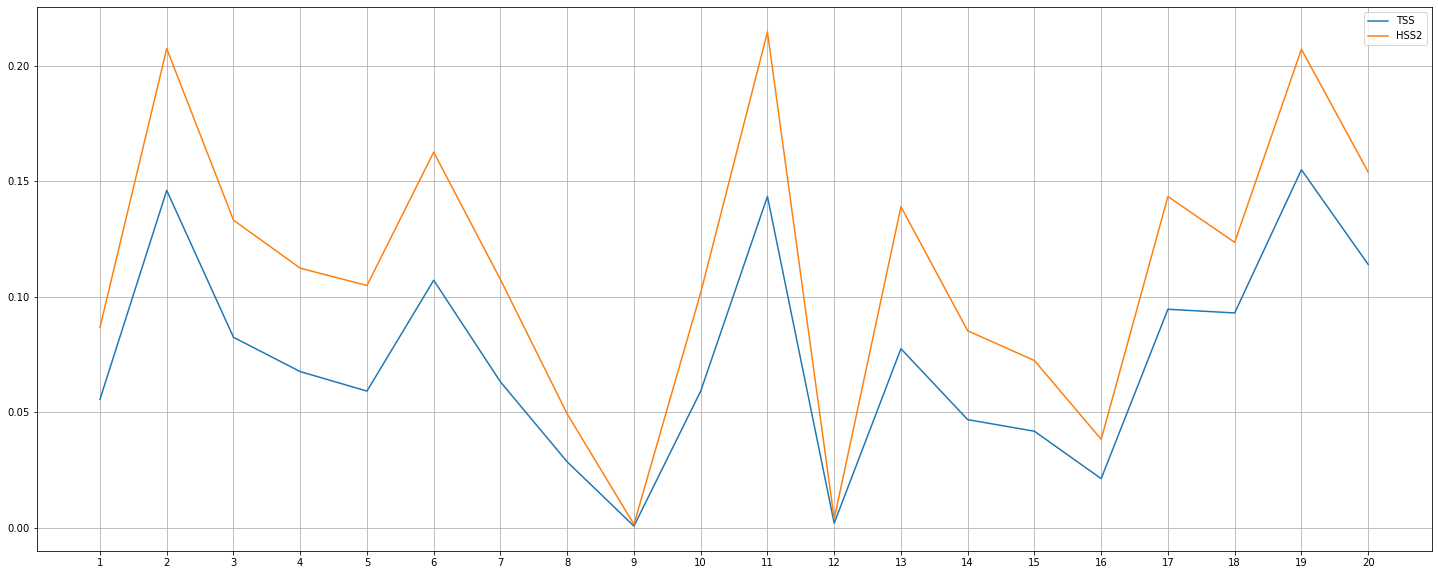

In [40]:
# Plotting the result
pair = np.arange(1,21)
plt.figure(figsize=(25,10))
plt.plot(pair, tss, label='TSS')
plt.plot(pair, hss2, label='HSS2')
plt.legend()
plt.xticks(pair)
plt.grid(True)

# Experiment 2 - All Labels

Same experiment with all labels

In [41]:
acc_all = []
cm_all = []

pair = 1

for i in pp_20_all:
    
    print("Pair Number: ", pair)
    pair+=1
    
    svc=SVC() 

    # fit classifier to training set
    svc.fit(i[0],i[2])

    # make predictions on test set
    y_pred=svc.predict(i[1])

    # compute and print accuracy score
    score = accuracy_score(i[3], y_pred)
    acc_all.append(score)
    print(score)
    
    #confusion matrix
    score2 = confusion_matrix(i[3],y_pred)
    cm_all.append(score2)
    print(score2)
    print("\n")

Pair Number:  1
0.8357325153065714
[[    0   191  4476    14     0]
 [  122  1619  6196   274     0]
 [   38   527 64782    17     0]
 [   34   542   575    74     0]
 [    0    56     0     4     0]]


Pair Number:  2
0.8399449910081456
[[    0    77   545    16     0]
 [   89  1691  3109   236     6]
 [   17   795 29909    42     3]
 [   11   601   370   160    22]
 [    0    43    46    24     0]]


Pair Number:  3
0.8567167603533326
[[    0    26   667     0     0]
 [   57  1255  3909   114     0]
 [   14   624 36014    15     0]
 [   21   422   303    71     0]
 [    0    69     0     4     0]]


Pair Number:  4
0.842533419544983
[[   19   199  5159     7     0]
 [   11  1486  3723    97     0]
 [   23   418 54452    15     0]
 [   33   450   326    74     1]
 [    0     0     0    10     0]]


Pair Number:  5
0.8265909320845799
[[    0   804  4620     0     0]
 [    0  2100  4118    48     0]
 [    0  1301 55014     4     0]
 [    0   507   445    77     0]
 [    0    51    92   

Measures

In [42]:
tss_all = []
hss2_all = []
order = 1
for i in cm_all:
    listt = list(i.ravel())
    TP = listt[18] + listt[19] + listt[23] + listt[24]
    FN = listt[15] + listt[16] + listt[17] + listt[20] + listt[21] + listt[22]
    FP = listt[3] + listt[4] + listt[8] + listt[9] + listt[13] + listt[14]
    TN = listt[0] + listt[1] + listt[2] + listt[5] + listt[6] + listt[7] + listt[10] + listt[11] + listt[12]
    TN = np.array(TN)
    FP = np.array(FP)
    FN = np.array(FN)
    TP = np.array(TP)
    acc = (TP + TN) / (TP + FN + TN + FP)
    pr_pos = TP/(TP + FP)
    pr_neg = TN/(TN + FN)
    rc_pos = TP/(TP + FN)
    rc_neg = TN/(TN + FP)
    f1_pos = (2 * pr_pos * rc_pos) / (pr_pos + rc_pos)
    f1_neg = (2 * pr_neg * rc_neg) / (pr_neg + rc_neg)
    P = TP + FN
    N = TN + FP
    HSS1 = (TP + TN - N) / P
    HSS2 = (2*((TP*TN)-(FP*FN)))/(P*(FN+TN)+(TP+FP)*N)
    CH = ((TP+FP)*(TP+FN))/(P+N)
    GS = (TP-CH)/(TP+FP+FN-CH)
    TSS = ((TP*TN)-(FP*FN))/(P*N)
    measures_array = ["Acc:", acc, "pr_pos:", pr_pos, "pr_neg:", pr_neg, "rc_pos:", rc_pos, "rc_neg:", rc_neg, "f1_pos:", f1_pos, "f1_neg:", f1_neg, "HSS1:", HSS1, "HSS2:", HSS2, "GS:", GS, "TSS:", TSS]
    tss_all.append(TSS)
    hss2_all.append(HSS2)
    print("Pair Number: ",order)
    order += 1
    print(measures_array)
    print("\n")

Pair Number:  1
['Acc:', 0.9809909354923876, 'pr_pos:', 0.20365535248041775, 'pr_neg:', 0.9847520149574269, 'rc_pos:', 0.060700389105058365, 'rc_neg:', 0.9961025352688612, 'f1_pos:', 0.09352517985611511, 'f1_neg:', 0.9903947552314281, 'HSS1:', -0.17665369649805449, 'HSS2:', 0.08674978535588687, 'GS:', 0.045341578791890186, 'TSS:', 0.05680292437391954]


Pair Number:  2
['Acc:', 0.963662329419232, 'pr_pos:', 0.40471512770137524, 'pr_neg:', 0.9712891724526177, 'rc_pos:', 0.16131558339859045, 'rc_neg:', 0.9917065827288901, 'f1_pos:', 0.23068309070548712, 'f1_neg:', 0.9813916953330264, 'HSS1:', -0.0759592795614722, 'HSS2:', 0.21558317681088454, 'GS:', 0.12081436019281279, 'TSS:', 0.15302216612748054]


Pair Number:  3
['Acc:', 0.9783411724217047, 'pr_pos:', 0.36764705882352944, 'pr_neg:', 0.981212973421544, 'rc_pos:', 0.08426966292134831, 'rc_neg:', 0.9969785689190772, 'f1_pos:', 0.13711151736745888, 'f1_neg:', 0.9890329476276779, 'HSS1:', -0.060674157303370786, 'HSS2:', 0.1304898024826036

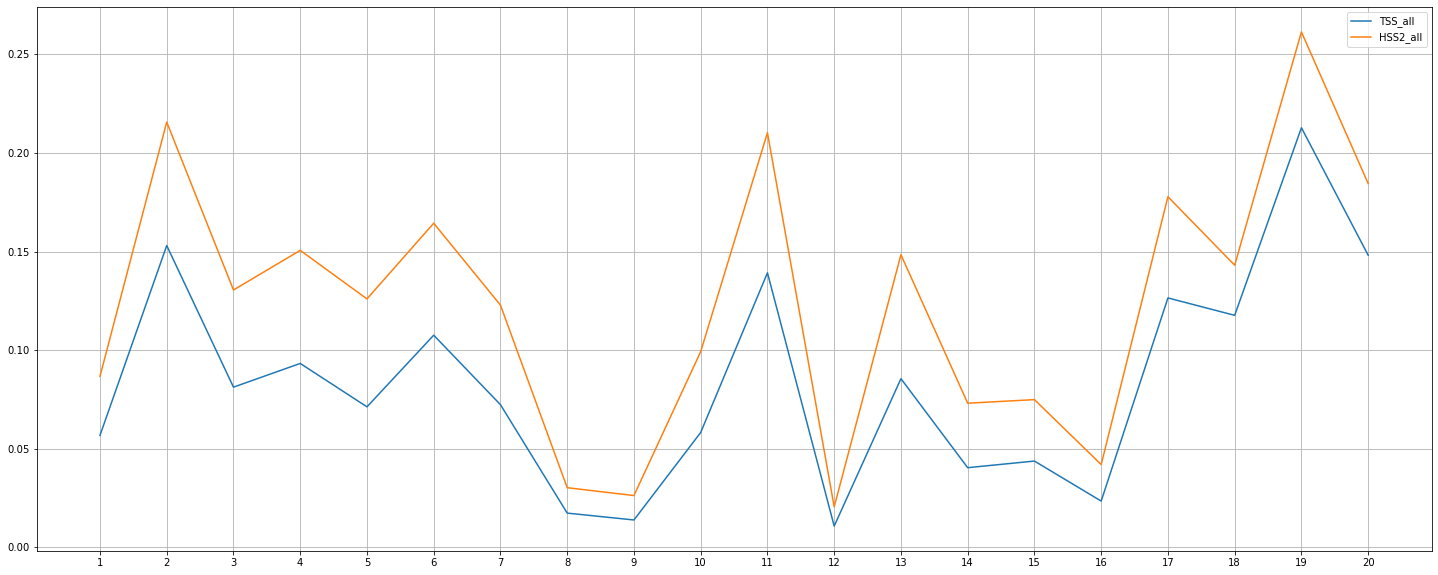

In [43]:
pair = np.arange(1,21)
plt.figure(figsize=(25,10))
plt.plot(pair, tss_all, label='TSS_all')
plt.plot(pair, hss2_all, label='HSS2_all')
plt.legend()
plt.xticks(pair)
plt.grid(True)

# Comparing TSS

In [29]:
tss_bin = [0.055680975618681815, 0.14613862400532246, 0.08253578097058967, 0.0676746311780014, 0.05924314354206858, 0.10725204342195976, 0.06322451777765205, 0.02860095209150897, 0.0007739379458999819, 0.05924363179571467, 0.14353718760321119, 0.0020085092952714955, 0.07758379935257821, 0.0468830027677295, 0.041844021871519345, 0.02131967967100056, 0.0946732124935608, 0.09308104419536559, 0.15509306091208064, 0.1140875112339813]
tss_all = [0.05680292437391954, 0.15302216612748054, 0.08124823184042548, 0.0932645242272001, 0.07126929362041066, 0.10758049559111263, 0.07235381350077832, 0.01740002795355019, 0.013921549764973779, 0.058273743085648456, 0.13920675920528547, 0.010819878854537302, 0.08554373785523402, 0.040427307521875726, 0.04378271272898977, 0.023495848890977507, 0.12647422537047065, 0.11764895937666818, 0.2127356449801571, 0.14812196781192966]

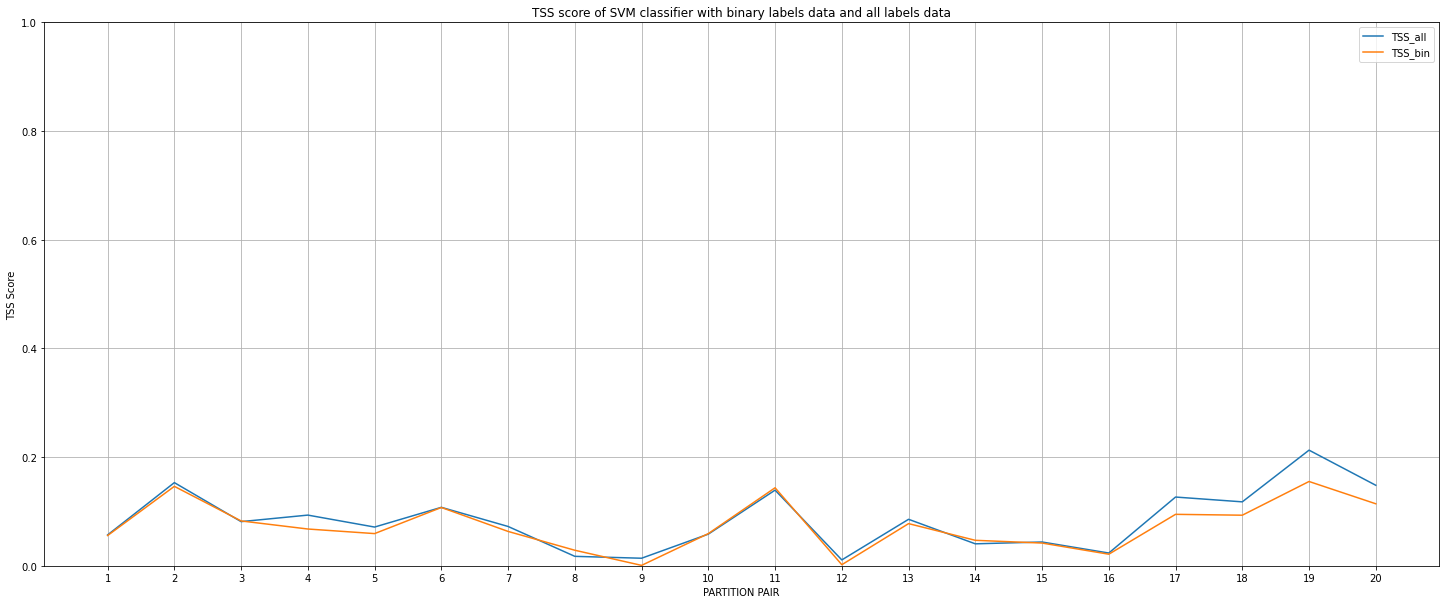

In [44]:
pair = np.arange(1,21)
plt.figure(figsize=(25,10))
plt.plot(pair, tss_all, label='TSS_all')
plt.plot(pair, tss_bin, label='TSS_bin')
plt.title("TSS score of SVM classifier with binary labels data and all labels data")
plt.xlabel("PARTITION PAIR")
plt.ylabel("TSS Score")
plt.ylim([0, 1])
plt.legend()
plt.xticks(pair)
plt.grid(True)